In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_laurent2016
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import logging
logging.getLogger().setLevel(logging.INFO)

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# load in the data from the provided examples
data, bb = load_laurent2016()
# bb[1,2] = 10000

In [3]:
newdata = pd.DataFrame([[5923.504395,4748.135254,3588.621094,'s2',1.0]],columns=['X','Y','Z','type','val'])
data = pd.concat([data,newdata])
data[np.logical_and(data['type'] == 's2',np.isnan(data['nx']))]
data.loc[np.logical_and(data['type'] == 's0',~np.isnan(data['val'])),'type'] = 's01'


In [4]:
# data.loc[np.logical_and(data['type'] == 's2',np.isnan(data['nx'])),'type'] = 's02'

In [5]:
rotation = [-69.11979675292969, 15.704944610595703, 6.00014591217041]

### Modelling S2

Add some more and try again.
Add some more and try again.
INFO:LoopStructural.visualisation.model_visualisation:Adding scalar field of s2_0 to viewer. Min: -8.015124, max: 7.474749
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s2_0 at 0.000000
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s2_0 at 1.000000



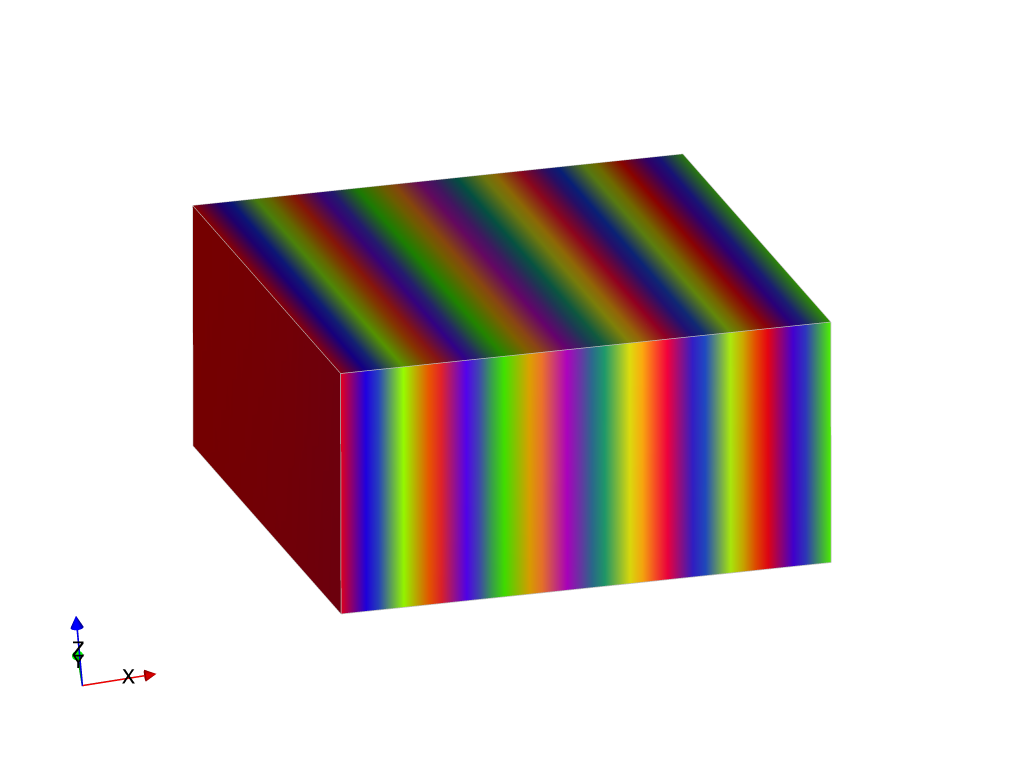

[-0.5 -0.5 -0.5]


In [6]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
s2 = model.create_and_add_fold_frame('s2',
                                     nelements=10000, 
                                     buffer=0.5,
                                    solver='lu',
                                    damp=True)
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s2['feature'][0],
                       cmap='prism')
viewer.add_isosurface(s2['feature'][0],
                     slices=[0,1])
viewer.add_data(s2['feature'][0])
viewer.rotate(rotation)
# viewer.interactive()
viewer.display()
print(s2['support'].origin)

### Modelling S1

In [7]:
s1 = model.create_and_add_folded_fold_frame('s1',
                                            limb_wl=4, 
                                            av_fold_axis=True,
                                            nelements=50000,
                                            buffer=0.3,
                                            solver='lu'
                                           )



INFO:LoopStructural.modelling.core.geological_model:Using last feature as fold frame
INFO:LoopStructural.modelling.core.geological_model:Creating regular tetrahedron mesh with 90000 elements 
for modelling using DFI
INFO:LoopStructural.modelling.core.geological_model:Creating regular tetrahedron mesh with 90000 elements 
for modelling using PLI
INFO:LoopStructural.modelling.features.geological_feature_builder:Adding 0 faults to s1_0
INFO:LoopStructural.modelling.fold.foldframe:Not using fold axis for fold limb rotation angle calculation
INFO:LoopStructural.modelling.core.geological_model:Guess: 0.000000 0.000000 0.000000 4.000000
INFO:LoopStructural.modelling.core.geological_model:There are 0 nans for the fold limb rotation angle and 104 observations
INFO:LoopStructural.modelling.core.geological_model:Fitted: -0.000043 -0.002969 0.006564 3.294186
INFO:LoopStructural.modelling.features.structural_frame_builder:Building s1 coordinate 0
INFO:LoopStructural.modelling.features.geological_fe

INFO:LoopStructural.visualisation.model_visualisation:Adding scalar field of s1_0 to viewer. Min: -0.328800, max: 1.286969



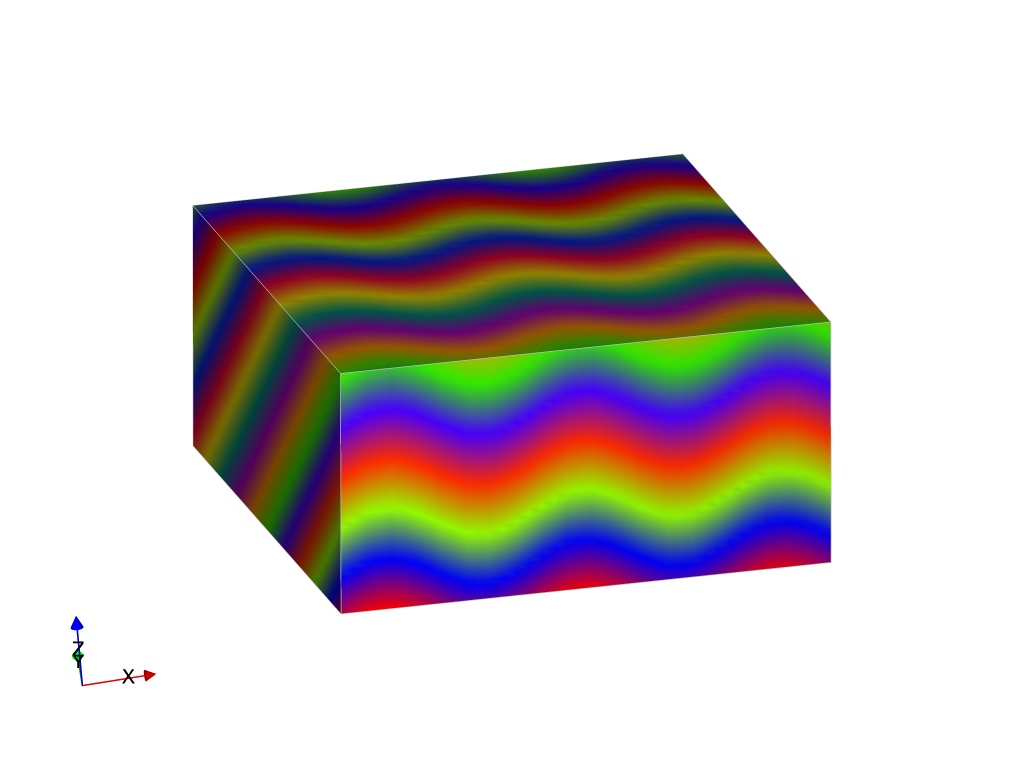

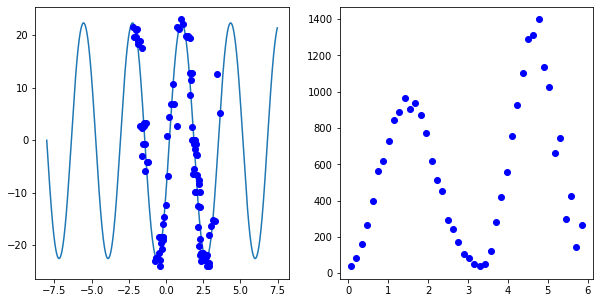

In [8]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s1['feature'][0],
                       cmap='prism')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

fig, ax = plt.subplots(1,2,figsize=(10,5))
x = np.linspace(s2['feature'][0].min(),s2['feature'][0].max(),1000)
ax[0].plot(x,s1['fold'].fold_limb_rotation(x))
ax[0].plot(s1['foliation'],s1['limb_rotation'],'bo')
ax[1].plot(s1['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

### Modelling S0

In [9]:
s0 = model.create_and_add_folded_foliation('s0',
                                            limb_wl=1., 
                                            av_fold_axis=True,
                                            nelements=50000,
                                            buffer=0.2,
                                            damp=True,
                                           solver='lu'
                                           )

INFO:LoopStructural.modelling.core.geological_model:Using last feature as fold frame
INFO:LoopStructural.modelling.core.geological_model:Creating regular tetrahedron mesh with 75690 elements 
for modelling using DFI
INFO:LoopStructural.modelling.features.geological_feature_builder:Adding 0 faults to s0
INFO:LoopStructural.modelling.fold.foldframe:Not using fold axis for fold limb rotation angle calculation
INFO:LoopStructural.modelling.core.geological_model:Guess: 0.000000 0.000000 0.000000 1.000000
INFO:LoopStructural.modelling.core.geological_model:There are 0 nans for the fold limb rotation angle and 89 observations
INFO:LoopStructural.modelling.core.geological_model:Fitted: 0.001718 -0.083230 0.004395 0.503420
INFO:LoopStructural.modelling.features.geological_feature_builder:Adding fold to s0
INFO:LoopStructural.modelling.fold.fold:Using constant fold axis
INFO:LoopStructural.interpolators.discrete_fold_interpolator:Adding fold orientation constraint to s0 w = 10.000000
INFO:LoopSt

INFO:LoopStructural.visualisation.model_visualisation:Adding scalar field of s0 to viewer. Min: -0.016406, max: 0.047537



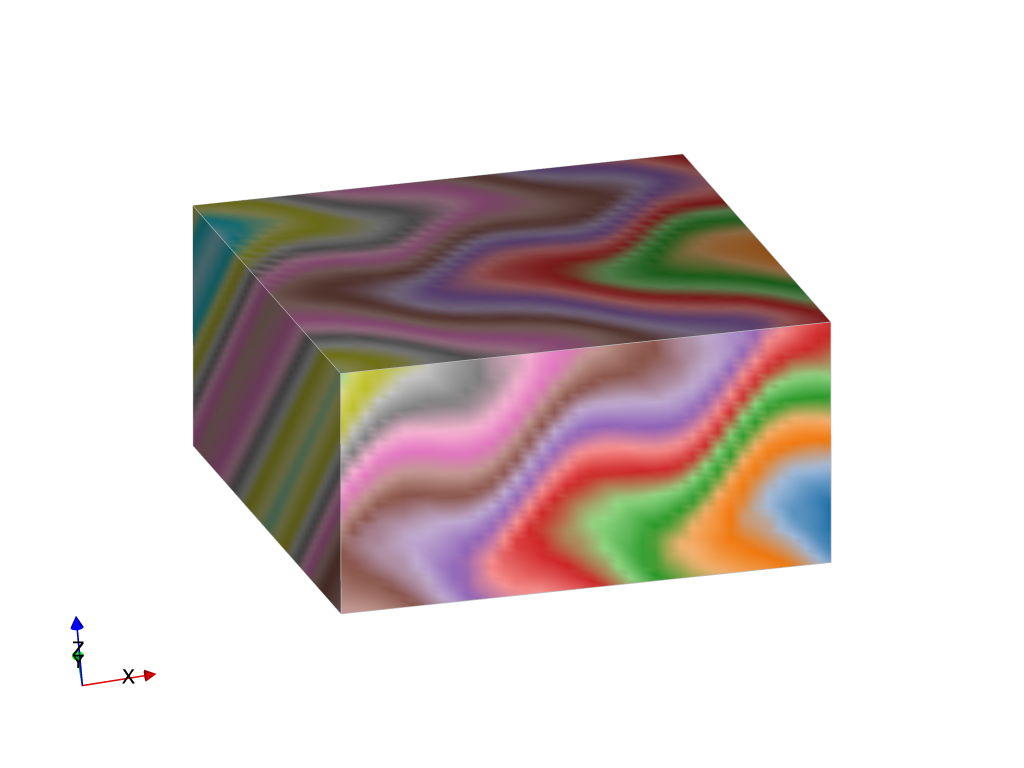

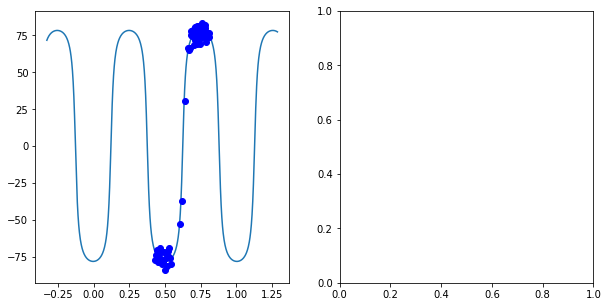

In [10]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s0['feature'],
                       cmap='tab20')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

fig, ax = plt.subplots(1,2,figsize=(10,5))
x = np.linspace(s1['feature'][0].min(),s1['feature'][0].max(),1000)
ax[0].plot(x,s0['fold'].fold_limb_rotation(x))
ax[0].plot(s0['foliation'],s0['limb_rotation'],'bo')
# ax[1].plot(s0['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s0 at -0.007200
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s0 at -0.002289
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s0 at 0.002623
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s0 at 0.007534
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s0 at 0.012445
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s0 at 0.017356
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s0 at 0.022268
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s0 at 0.027179
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s0 at 0.032090
INFO:LoopStructural.visualisation.model_visualisation:Creating isosurface of s0 at 0.037002



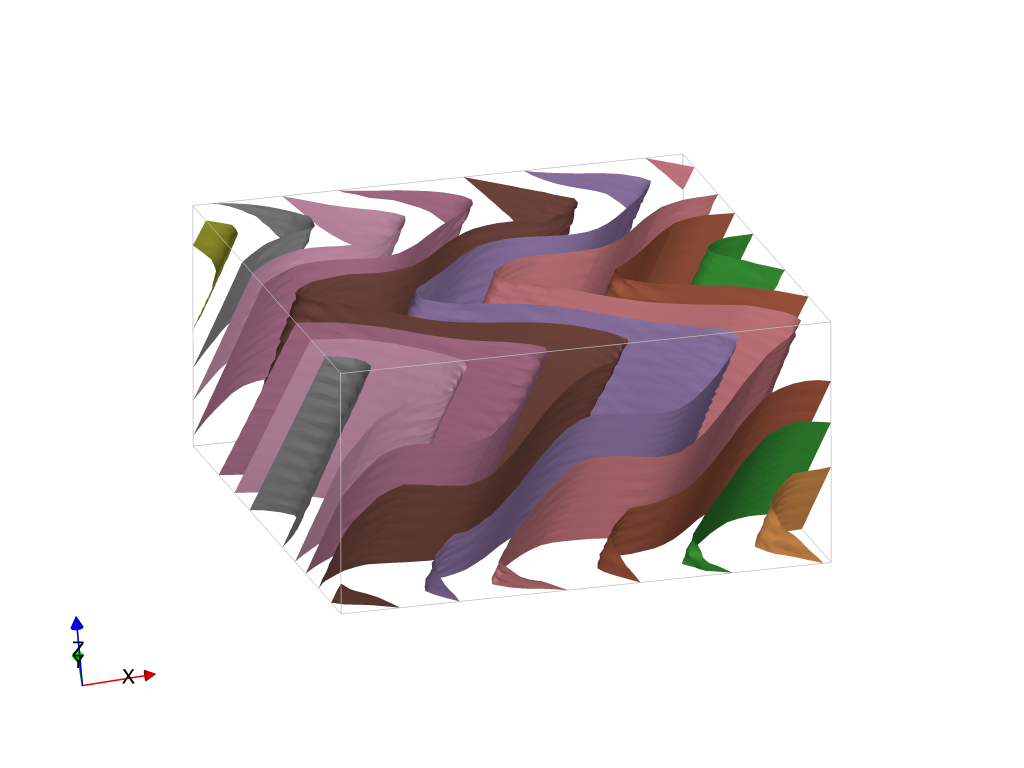

In [13]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(s0['feature'],nslices=10,paint_with=s0['feature'],cmap='tab20')
# viewer.add_data(s0['feature'])
# viewer.add_fold(s0['fold'],locations=s0['support'].barycentre()[::80])
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()